# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set(rc={'figure.figsize': (18, 8)})

In [3]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [4]:
workouts_users.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом workouts.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную trainings_by_day.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси X 
    - подпись оси Y 
4. Удали неполные данные, которые мешают анализу.

In [5]:
# напиши здесь код

In [6]:
workouts['date']=workouts.start_at.dt.date
trainings_by_day = workouts.groupby('date', as_index=False).agg({'workout_id':'count'})

In [7]:
trainings_by_day.columns=['date','workout_count']
trainings_by_day.head()

,date,workout_count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9


E:\Conda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Количество тренировок')

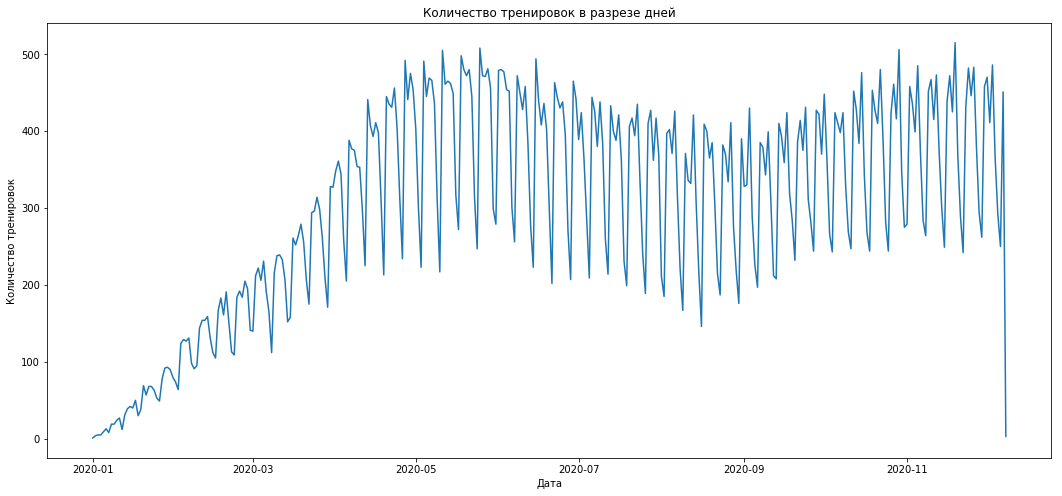

In [8]:
fig = plt.figure(figsize=(18, 8))
sns.lineplot(data=trainings_by_day, x="date", y="workout_count")
plt.title("Количество тренировок в разрезе дней")
plt.xlabel("Дата")
plt.ylabel("Количество тренировок")


In [9]:
# Мы видем четкую динамику на увеличение до мая месяца, самые высокие результаты в мае, доходит до 500 тренировок в день, все хотят "подкачаться к лету", далее к концу августа - началу сентября идёт спад 20%. и к ноябрю-декабрю опять доходит до 500 тренировок в день
# Вообще странно данные начинаются с нуля, как будто фитнес клуб только открылся, в январе очень мало тренировок. 
# Так же видны большие флуктуации , скорре всего это зависит от дня недели

In [10]:
#изучим данные в разрезе дней недели
workouts['day_of_week']=workouts.start_at.dt.dayofweek

In [11]:
trainings_by_day_of_week = workouts.groupby('day_of_week', as_index=False).agg({'workout_id':'count'})

In [12]:
trainings_by_day_of_week.day_of_week +=1

In [13]:
trainings_by_day_of_week.columns=['day_of_week', 'workouts_count']
trainings_by_day_of_week

,day_of_week,workouts_count
0,1,17953
1,2,17134
2,3,16310
3,4,17897
4,5,14912
5,6,11170
6,7,9317


Text(0, 0.5, 'Количество тренировок')

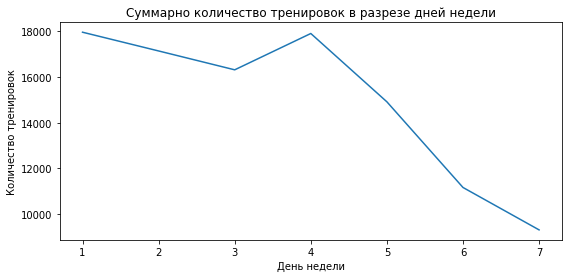

In [14]:
fig = plt.figure(figsize=(9, 4))
sns.lineplot(data=trainings_by_day_of_week, x="day_of_week", y="workouts_count")
plt.title("Суммарно количество тренировок в разрезе дней недели")
plt.xlabel("День недели")
plt.ylabel("Количество тренировок")

In [15]:
# самые популярные дни недели для посещения это понедельник и четверг, в выходные занимаются очень мало, особенно в воскресенье

## Задание 2

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью dt.weekday
    - добавили столбец с названием дня недели с помощью dt.day_name()
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [16]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,date,workout_count
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
5,2020-01-06,13
6,2020-01-07,8
7,2020-01-08,19
8,2020-01-09,19
9,2020-01-10,24


In [17]:
mean_train_day = trainings_by_day.workout_count.mean()
mean_train_day

305.2274052478134

In [18]:
trainings_by_day.columns=['workouts_date', 'workouts']  # переименуем столбцы, чтобы названия соответствовали содержимому

In [19]:
trainings_by_day = trainings_by_day.reset_index() # сбросим индекс

In [20]:
trainings_by_day.head()

,index,workouts_date,workouts
0,0,2020-01-01,1
1,1,2020-01-02,4
2,2,2020-01-03,5
3,3,2020-01-04,5
4,4,2020-01-05,9


In [21]:
trainings_by_day.workouts_date = pd.to_datetime(trainings_by_day.workouts_date)
trainings_by_day['week_day_num'] = trainings_by_day['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day['week_day_name'] = trainings_by_day['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day['week_day_num'] += 1 #Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [22]:
trainings_by_day.head()

,index,workouts_date,workouts,week_day_num,week_day_name
0,0,2020-01-01,1,3,Wednesday
1,1,2020-01-02,4,4,Thursday
2,2,2020-01-03,5,5,Friday
3,3,2020-01-04,5,6,Saturday
4,4,2020-01-05,9,7,Sunday


In [23]:
#Задача: сгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
trainings_by_day_mean = trainings_by_day.groupby('week_day_num',as_index=False).agg({'workouts':'mean'})
trainings_by_day_mean

,week_day_num,workouts
0,1,366.387755
1,2,349.673469
2,3,332.857143
3,4,365.244898
4,5,304.326531
5,6,227.959184
6,7,190.142857


In [24]:
#Задача:Построй bar chart. 
#Можешь добавить любые агрументы, но обязательно используй вот эти:

Text(0, 0.5, 'Среднее количество тренировок')

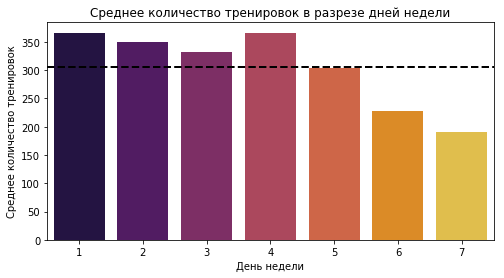

In [25]:
fig = plt.figure(figsize=(8, 4))
sns.barplot(trainings_by_day_mean.week_day_num ,trainings_by_day_mean.workouts,palette='inferno') 
plt.axhline( mean_train_day, color='k', linestyle='--', linewidth=2)
plt.title("Среднее количество тренировок в разрезе дней недели")
plt.xlabel("День недели")
plt.ylabel("Среднее количество тренировок")


## Задание 3

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. Для каждого департамента: 

    - отфильтруй по trainer_department тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

*Можешь воспользоваться циклом for из раздела Extra занятия.*

**Подготовим данные**


In [26]:
workouts.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,date,day_of_week
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2020-11-13,4
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2020-11-21,5
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2020-11-28,5
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2020-12-05,5
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2020-08-06,3


In [27]:
workouts.groupby('trainer_department').agg({'trainer_id':'nunique','client_id':'nunique'}) 
#тренеров получается почти столько же сколько и клиентов ?????

,trainer_id,client_id
trainer_department,,
Athletic,67,59
Consultant,739,849
Cycling,67,67
Dinamo,344,298
Sales,799,4257
Spartacus,3044,3610
Sports Reserves,340,370


In [28]:
x = workouts.groupby('trainer_id',as_index=False).agg({'trainer_department':'nunique'})
x = x.trainer_department.sort_values(ascending=False)
x.value_counts() #посмотрел в скольких департаментах присутвуют тренеры, большая часть только в одном департаменте

1    4074
2     663
0      14
Name: trainer_department, dtype: int64

Text(0, 0.5, 'Количество тренеров')

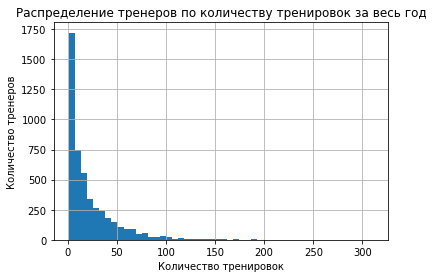

In [29]:
workouts.trainer_id.value_counts().sort_values().hist(bins=50)
plt.title("Распределение тренеров по количеству тренировок за весь год")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
# большая часть тренеров имеет очень маленькое количество тренировок, при учете что данные за год, то это совсем мало

In [30]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [31]:
len(trainers_select)

4462

In [32]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

In [33]:
november_workouts.shape # около 389 тренировок в день

(11698, 12)

In [34]:
# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [35]:
november_workouts.trainer_id.nunique() 
# 1607 тренеров в ноябре ??? Какого размера  сеть фитнес клубов ???

1607

In [36]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [37]:
workouts_by_trainer.trainer_id.nunique() #1607 уникальных тренеров за ноябрь ?, очень странная цифра для фитнес клуба

1607

In [38]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

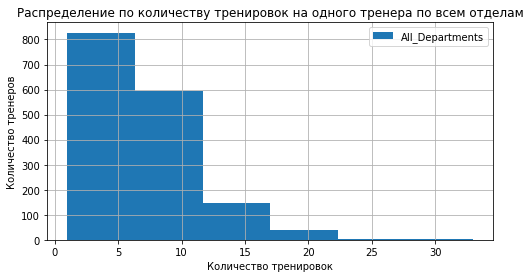

In [39]:
fig = plt.figure(figsize=(8, 4))
workouts_by_trainer.workouts.hist(bins=6, label='All_Departments')
plt.title("Распределение по количеству тренировок на одного тренера по всем отделам")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

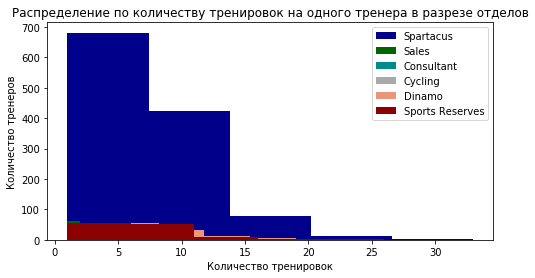

In [40]:
fig = plt.figure(figsize=(8, 4))

plt.hist(workouts_by_trainer.query('trainer_department=="Spartacus"').workouts, label='Spartacus',bins=5,color = "darkblue")
plt.hist(workouts_by_trainer.query('trainer_department=="Sales"').workouts, label='Sales',bins=5, color='darkgreen')
plt.hist(workouts_by_trainer.query('trainer_department=="Consultant"').workouts, label='Consultant',bins=5, color='darkcyan')
plt.hist(workouts_by_trainer.query('trainer_department=="Cycling"').workouts, label='Cycling',bins=5, color='darkgray')
plt.hist(workouts_by_trainer.query('trainer_department=="Dinamo"').workouts, label='Dinamo',bins=5,color="darksalmon")
plt.hist(workouts_by_trainer.query('trainer_department=="Sports Reserves"').workouts, label='Sports Reserves',bins=5, color='darkred')
plt.title("Распределение по количеству тренировок на одного тренера в разрезе отделов")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

In [41]:
#плохо видно некоторые департаменты, сделаем отдельные графики для каждого департамента

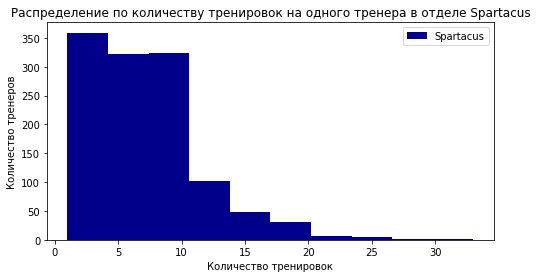

In [68]:
fig = plt.figure(figsize=(8, 4))

plt.hist(workouts_by_trainer.query('trainer_department=="Spartacus"').workouts, label='Spartacus',bins=10, color='darkblue')
plt.title("Распределение по количеству тренировок на одного тренера в отделе Spartacus")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

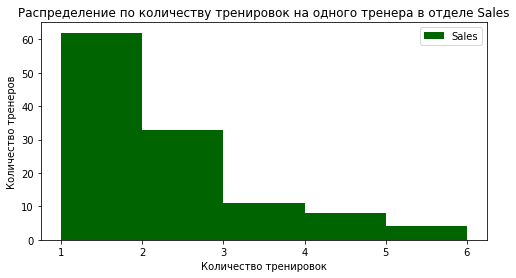

In [70]:
fig = plt.figure(figsize=(8, 4))
plt.hist(workouts_by_trainer.query('trainer_department=="Sales"').workouts, label='Sales', bins=5,color='darkgreen')

plt.title("Распределение по количеству тренировок на одного тренера в отделе Sales")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

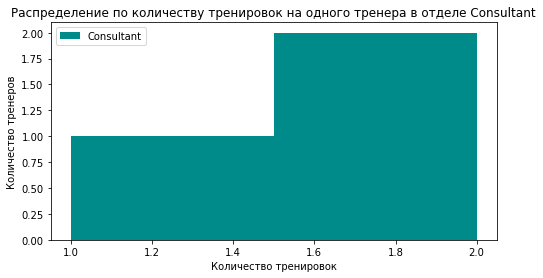

In [71]:
fig = plt.figure(figsize=(8, 4))
plt.hist(workouts_by_trainer.query('trainer_department=="Consultant"').workouts, label='Consultant', bins=2,color='darkcyan')

plt.title("Распределение по количеству тренировок на одного тренера в отделе Consultant")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

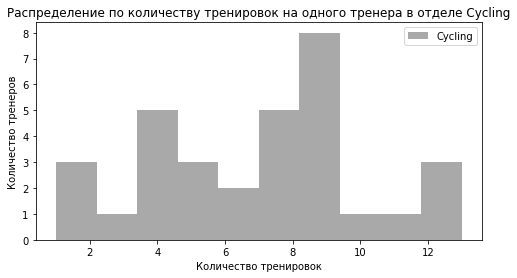

In [72]:
fig = plt.figure(figsize=(8, 4))
plt.hist(workouts_by_trainer.query('trainer_department=="Cycling"').workouts, label='Cycling', bins=10,color='darkgray')

plt.title("Распределение по количеству тренировок на одного тренера в отделе Cycling")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

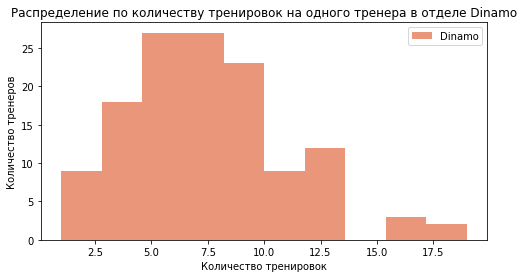

In [73]:
fig = plt.figure(figsize=(8, 4))
plt.hist(workouts_by_trainer.query('trainer_department=="Dinamo"').workouts, label='Dinamo', bins=10,color='darksalmon')

plt.title("Распределение по количеству тренировок на одного тренера в отделе Dinamo")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

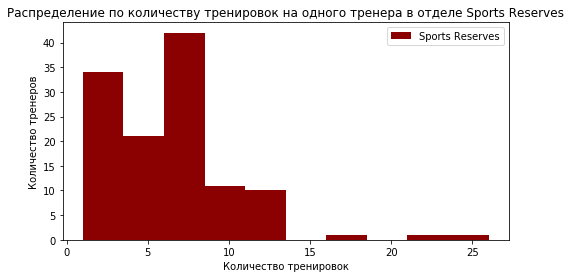

In [74]:
fig = plt.figure(figsize=(8, 4))
plt.hist(workouts_by_trainer.query('trainer_department=="Sports Reserves"').workouts, label='Sports Reserves', bins=10,color='darkred')

plt.title("Распределение по количеству тренировок на одного тренера в отделе Sports Reserves")
plt.xlabel("Количество тренировок")
plt.ylabel("Количество тренеров")
plt.legend()

## Задание 4

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

In [48]:
workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


Text(0, 0.5, 'Департамент')

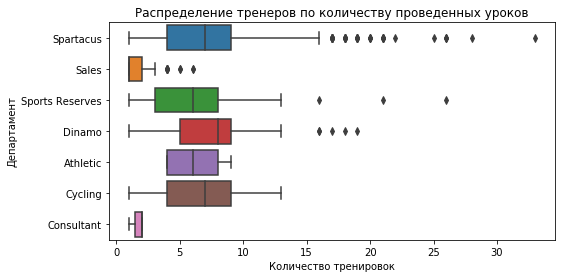

In [49]:
# напиши здесь код
fig = plt.figure(figsize=(8, 4))
sns.boxplot(x='workouts', y='trainer_department', data=workouts_by_trainer)
plt.title("Распределение тренеров по количеству проведенных уроков")
plt.xlabel("Количество тренировок")
plt.ylabel("Департамент")

In [50]:
# Вывод, в отделе Spartacus часть тренеров перерабатывает очень сильно, так же перерабатывают и в 
# отделах Sports Reserves, Dinamo
# если тренеры взаимозаяменяемые, то можно перекинуть из отделов Athletic и Cycling в недостающие отделы.
# если же нет, тогда привлечь дополнительно ещё тренеров со стороны или поднять цену на тренировки что бы сократить спрос

## Задание 5


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на int
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике
    
Подготовим данные:

In [51]:
workouts_users.head(1)

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва


In [52]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
5,500,10,0.317073
6,500,11,0.403846
7,500,12,0.240741
8,500,13,0.351852
9,500,14,0.254545


Text(0, 0.5, 'Цена тренировки')

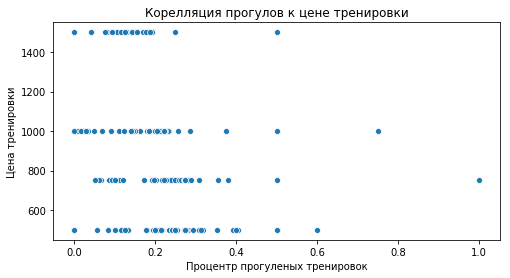

In [53]:
# напиши здесь код
fig = plt.figure(figsize=(8, 4))
sns.scatterplot(data=cost_age_data_agg, x='status', y='cost')
plt.title("Корелляция прогулов к цене тренировки")
plt.xlabel("Процентр прогуленых тренировок")
plt.ylabel("Цена тренировки")

In [54]:
#Видна очевидная корреляция цены и прогула, чем выше цена, тем меньше прогуливают

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму cost_age_data_agg, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - задай цвет на графике

In [55]:
# напиши здесь код
age_data = workouts_users[['status','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
age_data['age'] = age_data['age'].apply(int) 


# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
age_data['status'] = age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
age_data_agg = age_data.groupby(['age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

age_data_agg.head(5)

,age,status
0,4,0.250000
1,5,0.500000
2,6,0.216216
3,7,0.241379
4,8,0.249221


Text(0, 0.5, 'Возраст')

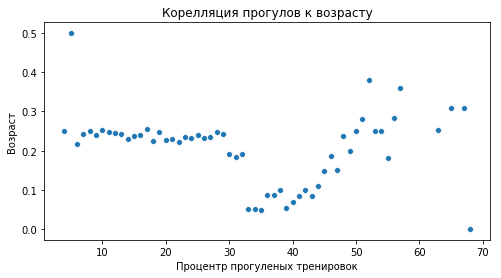

In [56]:
fig = plt.figure(figsize=(8, 4))
sns.scatterplot(data=age_data_agg, x='age', y='status')
plt.title("Корелляция прогулов к возрасту")
plt.xlabel("Процентр прогуленых тренировок")
plt.ylabel("Возраст")

In [57]:
#почему то после 30 люди кардинально по другому "прогуливают", у людей до 30 примерно одинаковый процент прогулов.
# после 30 люди начинают меньше прогуливать
# а после 50 наоборот уже больше

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной price_color. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси X
        - подпись оси Y
        - аргумент  с - цвета для разных цен
          

In [58]:
cost_age_data_agg.cost.unique()

array([ 500,  750, 1000, 1500], dtype=int64)

In [59]:
price_color = {500:'gray',750:'green', 1000:'blue', 1500:'red'}

Text(0, 0.5, 'Цена тренировки')

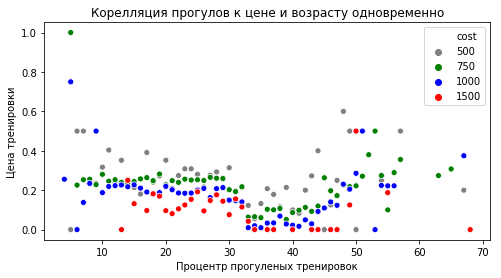

In [60]:
fig = plt.figure(figsize=(8, 4))
sns.scatterplot(data=cost_age_data_agg, x='age', y='status', hue='cost', palette = price_color) 
plt.title("Корелляция прогулов к цене и возрасту одновременно")
plt.xlabel("Процентр прогуленых тренировок")
plt.ylabel("Цена тренировки")


In [61]:
# опять видно четко что люди до 30 и после 30 ведут себя сильно по разному
# среди всех пропусков, меньше всего пропускают дорогие занятия, и больше дешевые

## Задание 6

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси X
    - подпись оси Y
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [62]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [63]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg.head(1)

,cost,age_bin,status
0,500,0-20,0.286578


In [64]:
table = pd.pivot_table(cost_age_data_agg, values='status', index='cost', columns='age_bin')

Text(51.0, 0.5, 'Цена тренировки')

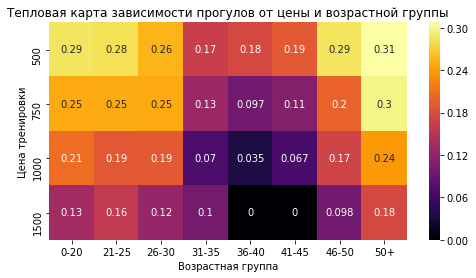

In [65]:
fig = plt.figure(figsize=(8, 4))
sns.heatmap(table, annot=True,cmap="inferno")
plt.title("Тепловая карта зависимости прогулов от цены и возрастной группы")
plt.xlabel("Возрастная группа")
plt.ylabel("Цена тренировки")

In [66]:
#три возрастные группы между 31-45 менее всего прогуливают
#так же видно как стоимость тренировок влияет на прогулы во всех возрастных категориях